In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

from champ_optics_Model import MCMC_Model

from glob import glob
from pathlib import PurePath

c:\Users\xiaod\.conda\envs\CCATholo\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
def plot_meas(data_List,data_f_List):
    fig = plt.figure(figsize=(12,10))
    for idx, data in enumerate(data_List):
        x = data[:,0]
        plt.subplot(211)
        plt.plot(
            x,
            data[:,1],
            '*-',
            label=f"{data_f_List[idx].split('/')[-1]}"
        )
        plt.grid('both')
        plt.legend(fontsize=5)
        plt.xlabel(r'$\Delta z$ [mm]')

        plt.subplot(212)
        freq = fft.fftshift(
            fft.fftfreq(
                data.shape[0],
                np.diff(x).mean()
            )
        )
        delta_x = np.diff(x).mean()
        spectrum = fft.ifftshift(fft.ifft(data[:,1]))
        plt.plot(
            1./freq,
            np.abs(spectrum),'*-',
            label=f"{data_f_List[idx].split('/')[-1]}"
        )
        plt.xscale('log')
        plt.yscale('log')
        plt.legend(fontsize=12)
        plt.grid('both')
        plt.xlabel(r'$\lambda \ [\mathrm{mm}]$')
    plt.tight_layout()
    plt.show()

def get_samples(data_List):
    data_samples=np.zeros([data_List[0].shape[0],len(data_List)])
    for idx, data in enumerate(data_List):
        data_samples[:,idx] = data[:,1]
    x_vec=data_List[0][:,0]

    data_samples_zp = data_samples.copy()
    freq_vec = fft.fftshift(
        fft.fftfreq(
            data_samples_zp.shape[0], 
            np.diff(x_vec).mean()
            )
        )
    spec_samp = fft.ifftshift(
        fft.ifft(data_samples_zp, axis=0)
        )
    
    return x_vec, data_samples, freq_vec, spec_samp
    
def plot_mean(x_vec,samples,f_vec,spec):
    fig = plt.figure(figsize=(12,10))
    plt.subplot(311)
    mean,err = MCMC_Model.get_mean_err(samples)
    spec_mean,spec_err = MCMC_Model.get_mean_err(np.abs(spec))
    plt.errorbar(
        x_vec,
        mean,
        yerr=err,
        marker='.', ls='--', color=f'gray',
        label=f"all data",
        capsize=3, markeredgewidth=2,
        fillstyle='none'
    )
    plt.grid(which='both', axis='both')
    plt.legend()
    plt.xlabel(r'$\Delta z$ [mm]')

    plt.subplot(312)
    plt.errorbar(
        1./f_vec,
        spec_mean,
        yerr=spec_err,
        marker='.', ls='--', color=f'gray',
        label=f"all data",
        capsize=3, markeredgewidth=2,
        fillstyle='none'
    )
    plt.xscale('log')
    plt.yscale('log')

    plt.grid(which='both', axis='both')
    plt.legend()
    plt.xlabel(r'$\lambda \ [\mathrm{mm}]$')

    plt.subplot(313)
    plt.errorbar(
        f_vec,
        spec_mean,
        yerr=spec_err,
        marker='.', ls='--', color=f'gray',
        label=f"all data",
        capsize=3, markeredgewidth=2,
        fillstyle='none'
    )
    # plt.xscale('log')
    plt.yscale('log')

    plt.grid(which='both', axis='both')
    plt.legend()
    plt.xlabel(r'$k \ [\mathrm{mm}^{-1}]$')
    plt.tight_layout()
    

### 1. Analysis 93cm separation distance

C:\Users\xiaod\AppData\Local\Temp\ipykernel_21556\3853607542.py:26: RuntimeWarning: divide by zero encountered in divide
  1./freq,


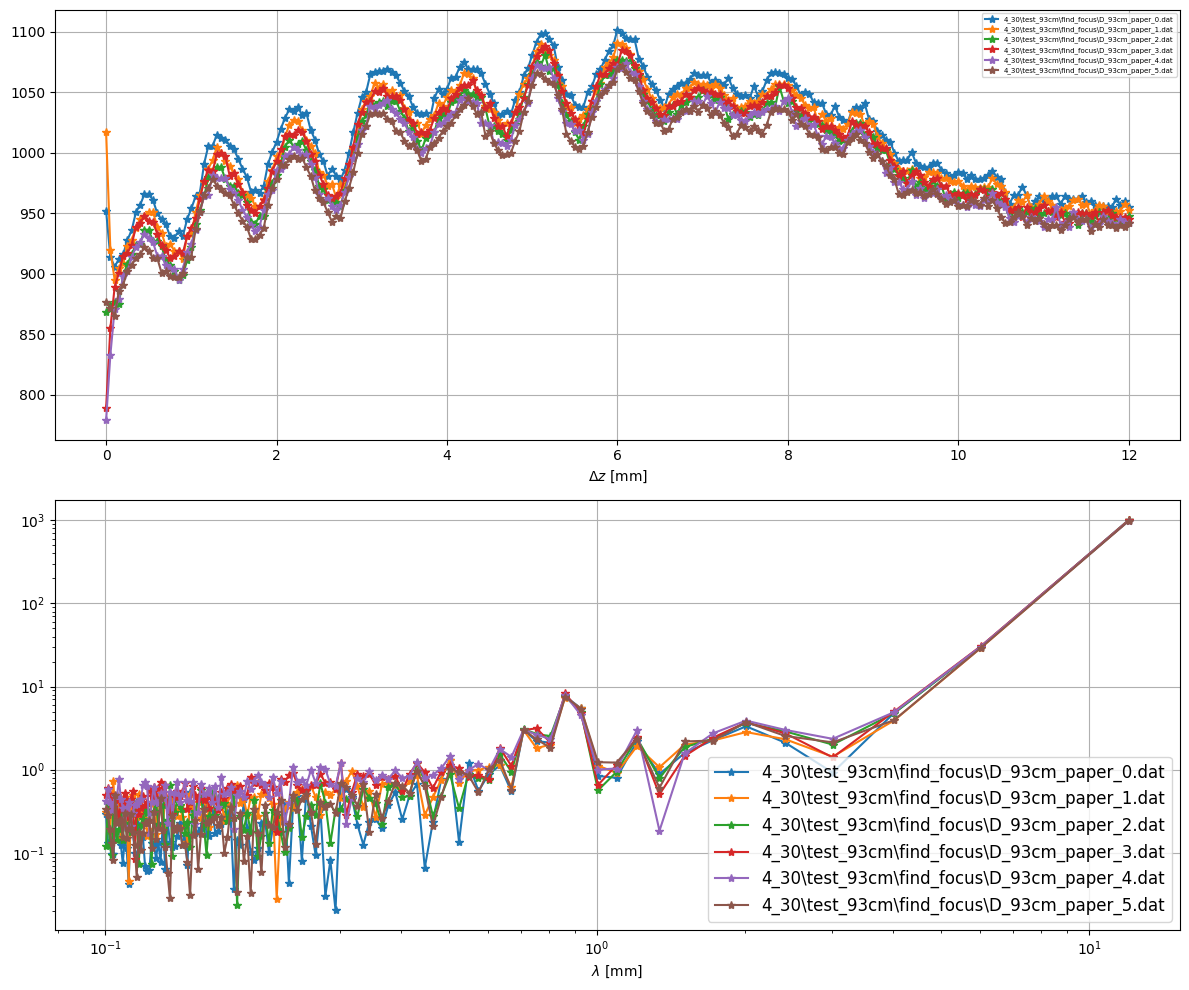

C:\Users\xiaod\AppData\Local\Temp\ipykernel_21556\3853607542.py:77: RuntimeWarning: divide by zero encountered in divide
  1./f_vec,


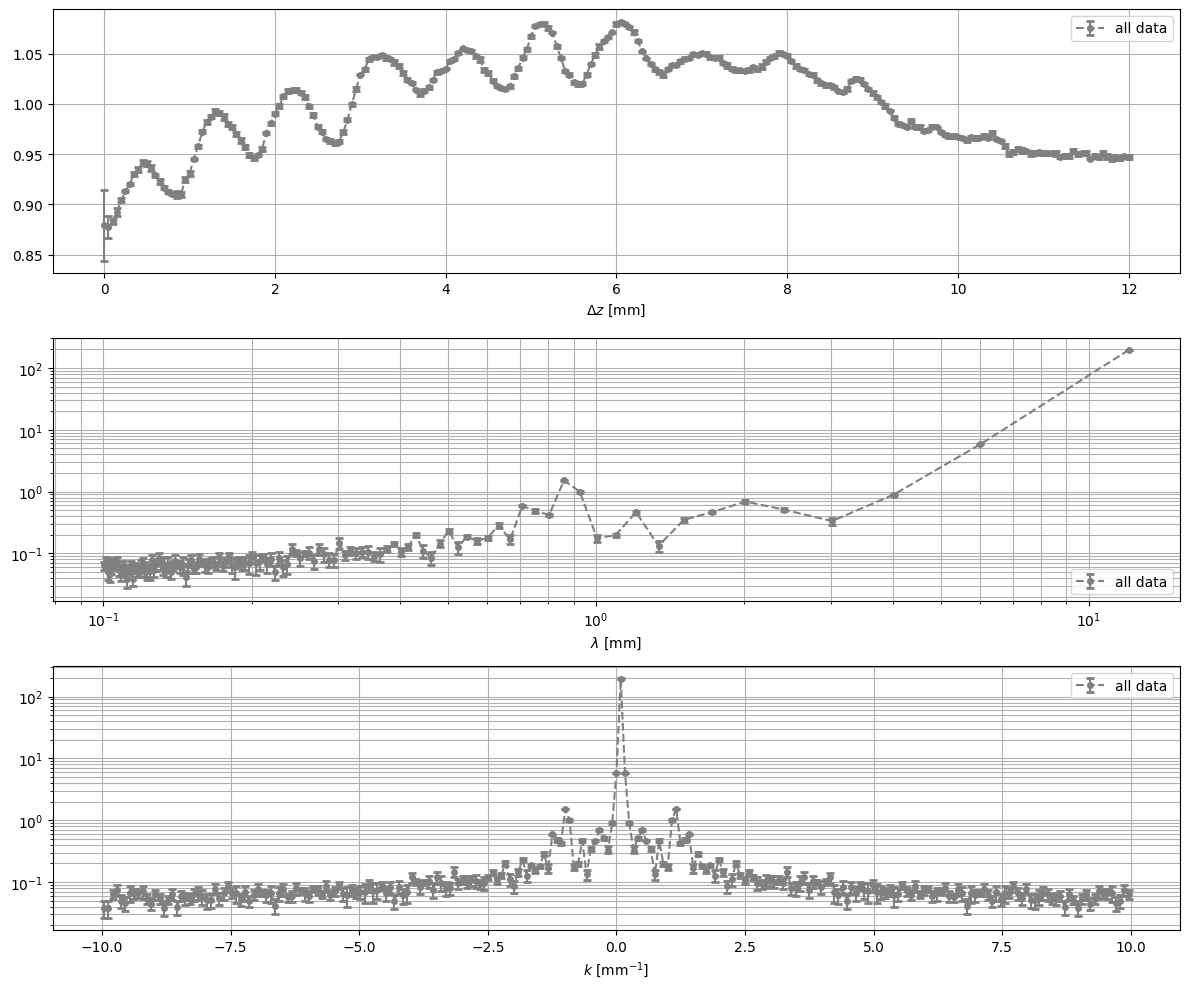

In [24]:
# 1. read data
D_folder1=PurePath('./4_30/test_93cm/find_focus/')
data_file_list = sorted(glob(str(D_folder1 / "D_93cm_paper*")))
data_list1 = [
    np.genfromtxt(data_file) for data_file in data_file_list
]

# 2. plot and analysis its spectrum
plot_meas(data_list1,data_file_list)
z_vec, data_samples1, freq_vec, Spec_samples1 = get_samples(data_list1)
plot_mean(z_vec, data_samples1, freq_vec, Spec_samples1)



In [25]:
# 3. ran mcmc
n_walkers = 50

"""Model 1 3rd polynomial model"""
bounds_0 = np.asarray(
    [
        [-10, 10]
        [-10, 10],
        [0, 12],
        [1500, 2500]
    ]
)
parabola = MCMC_Model(
    x_vec, data_samples, 
    3, 0, 
    bounds_0,
    "parabola"
)

<>:7: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:7: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
C:\Users\xiaod\AppData\Local\Temp\ipykernel_21556\2784806120.py:7: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [-10, 10]
C:\Users\xiaod\AppData\Local\Temp\ipykernel_21556\2784806120.py:7: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [-10, 10]
C:\Users\xiaod\AppData\Local\Temp\ipykernel_21556\2784806120.py:7: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [-10, 10]


TypeError: list indices must be integers or slices, not tuple